In [1]:
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [2]:
file = pd.read_csv('16zpallagi.csv')
#print (file.head())
#print (file.shape)

data = file [['STATE', 'zipcode', 'agi_stub', 'N1', 'N2', 'ELDERLY', 'NUMDEP','SCHF', 'N02650', 'A02650']]
#print (data.head())

clean = data[(data['zipcode'] < 99999) & (data['zipcode'] > 0)]
update = clean[['STATE', 'agi_stub', 'N1', 'N2', 'ELDERLY', 'NUMDEP', 'SCHF', 'A02650']]

update.to_csv('cleanData')

file1 = pd.read_csv('cleanData.csv')
print (file1.head())

   Unnamed: 0 STATE  agi_stub    N1    N2  ELDERLY  NUMDEP  SCHF  A02650
0           6    AL         1  1510  2130      340     660     0   19675
1           7    AL         2  1410  2660      270     900     0   52487
2           8    AL         3   950  2080      200     660     0   59519
3           9    AL         4   650  1690      130     560     0   56657
4          10    AL         5   630  1800      130     610     0   81672


In [17]:
va = update[update['STATE'] == 'VA']
print (va.head(20))
vaOut = va[(np.abs(stats.zscore(va.drop(['STATE'],axis=1))) < 3).all(axis=1)]
vaOut.info()
print (vaOut.describe())

"""
nj = update[update['STATE'] == 'NJ']
#print (nj.head(20))
njOut = va[(np.abs(stats.zscore(va.drop(['STATE'],axis=1))) < 3).all(axis=1)]

tx = update[update['STATE'] == 'TX']
#print (tx.head())
txOut = va[(np.abs(stats.zscore(va.drop(['STATE'],axis=1))) < 3).all(axis=1)]

ca = update[update['STATE'] == 'CA']
#print (ca.head())
caOut = va[(np.abs(stats.zscore(va.drop(['STATE'],axis=1))) < 3).all(axis=1)]

fl = update[update['STATE'] == 'FL']
#print (fl.head())
flOut = va[(np.abs(stats.zscore(va.drop(['STATE'],axis=1))) < 3).all(axis=1)]
"""

       STATE  agi_stub    N1     N2  ELDERLY  NUMDEP  SCHF  A02650
162833    VA         1  1720   1630      270     370     0   18693
162834    VA         2  1120   1970      160     610     0   42326
162835    VA         3  1090   2260      160     790     0   68905
162836    VA         4  1100   2640      130     990     0   97392
162837    VA         5  3630  11180      330    4650    40  531488
162838    VA         6  2000   7000      170    3110     0  637175
162839    VA         1   620    730      130     170    20    7591
162840    VA         2   440    770      130     190     0   16700
162841    VA         3   320    620      120     150    30   19894
162842    VA         4   280    630      110     170     0   24224
162843    VA         5   570   1560      180     500    50   79026
162844    VA         6   110    310       40      90     0   35320
162845    VA         1  6740  10250      670    3640     0   91923
162846    VA         2  5600  11140      510    4310     0  20

"\nnj = update[update['STATE'] == 'NJ']\n#print (nj.head(20))\nnjOut = va[(np.abs(stats.zscore(va.drop(['STATE'],axis=1))) < 3).all(axis=1)]\n\ntx = update[update['STATE'] == 'TX']\n#print (tx.head())\ntxOut = va[(np.abs(stats.zscore(va.drop(['STATE'],axis=1))) < 3).all(axis=1)]\n\nca = update[update['STATE'] == 'CA']\n#print (ca.head())\ncaOut = va[(np.abs(stats.zscore(va.drop(['STATE'],axis=1))) < 3).all(axis=1)]\n\nfl = update[update['STATE'] == 'FL']\n#print (fl.head())\nflOut = va[(np.abs(stats.zscore(va.drop(['STATE'],axis=1))) < 3).all(axis=1)]\n"

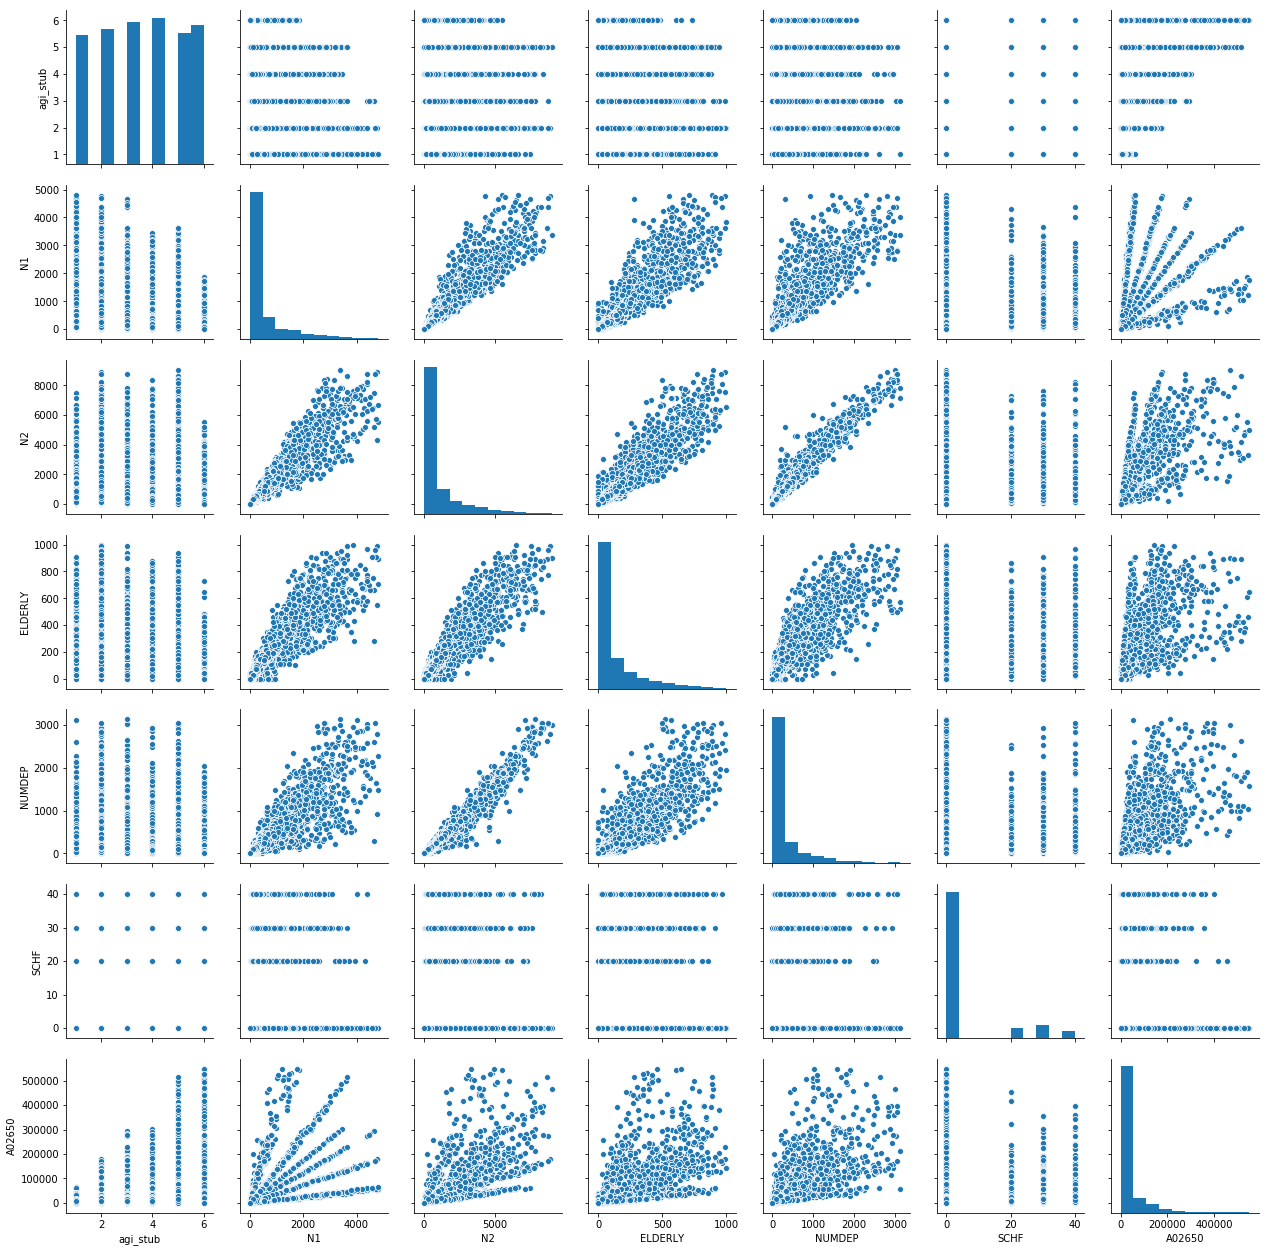

In [4]:
sns.pairplot(vaOut)

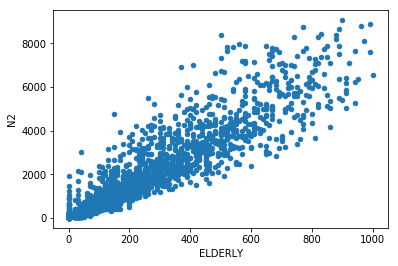

In [5]:
vaOut.plot.scatter(x='ELDERLY',y='N2')

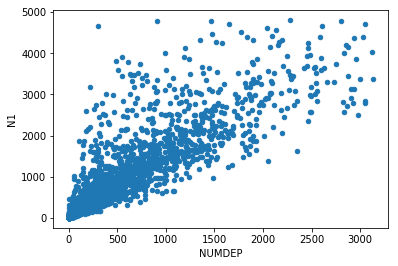

In [6]:
vaOut.plot.scatter(x='NUMDEP',y='N1')

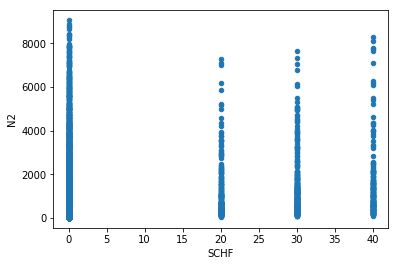

In [7]:
vaOut.plot.scatter(x='SCHF',y='N2')

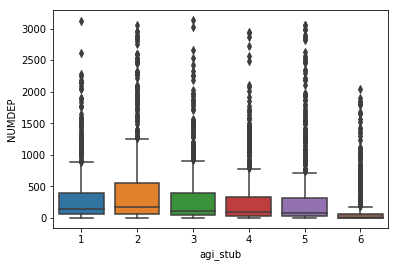

In [8]:
sns.boxplot(x='agi_stub',y='NUMDEP',data=vaOut)

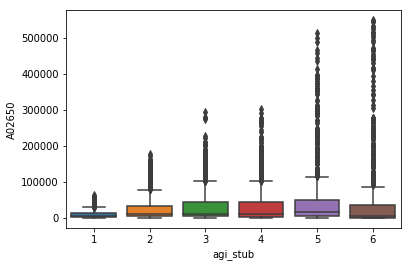

In [9]:
sns.boxplot(x='agi_stub',y='A02650',data=vaOut)

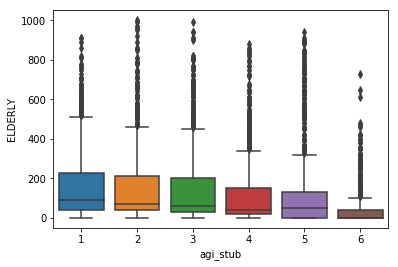

In [10]:
sns.boxplot(x='agi_stub',y='ELDERLY',data=vaOut)

/home/finch/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


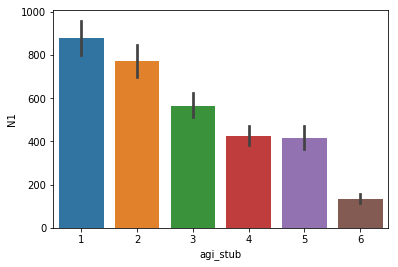

In [11]:
sns.barplot(x='agi_stub',y='N1',data=vaOut)

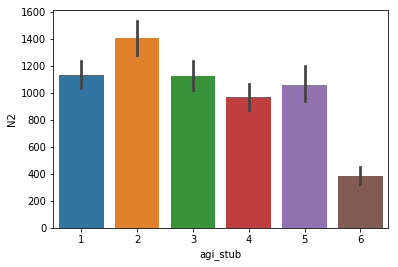

In [12]:
sns.barplot(x='agi_stub',y='N2',data=vaOut)

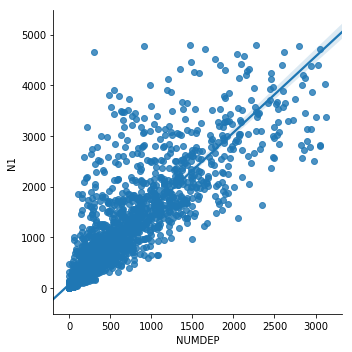

In [13]:
sns.lmplot(x='NUMDEP',y='N1',data=vaOut)

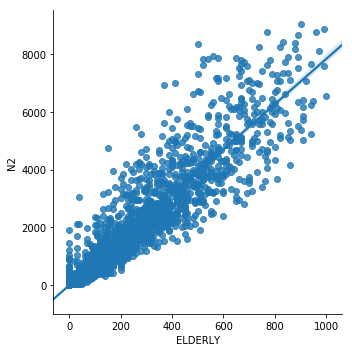

In [14]:
sns.lmplot(x='ELDERLY',y='N2',data=vaOut)

In [15]:
"""
#stats.ttest_1samp(vaOut['agi_stub'], 0) 
#corr, p = pearsonr(vaOut['N1'], vaOut['N2'])
#print (corr)

#corr, p = pearsonr(vaOut['N1'], vaOut['agi_stub'])
#print (corr)

vaOut['N1'].corr(vaOut['agi_stub'], method= 'spearman')

df_dummies = pd.get_dummies(vaOut['agi_stub'])
#print (df_dummies.head())

df_new = pd.concat([vaOut, df_dummies], axis=1)
del df_new['agi_stub']
print(df_new.head())

corr, p = pearsonr(df_new['ELDERLY'], df_new[[8]])
print (corr)
"""

"\n#stats.ttest_1samp(vaOut['agi_stub'], 0) \n#corr, p = pearsonr(vaOut['N1'], vaOut['N2'])\n#print (corr)\n\n#corr, p = pearsonr(vaOut['N1'], vaOut['agi_stub'])\n#print (corr)\n\nvaOut['N1'].corr(vaOut['agi_stub'], method= 'spearman')\n\ndf_dummies = pd.get_dummies(vaOut['agi_stub'])\n#print (df_dummies.head())\n\ndf_new = pd.concat([vaOut, df_dummies], axis=1)\ndel df_new['agi_stub']\nprint(df_new.head())\n\ncorr, p = pearsonr(df_new['ELDERLY'], df_new[[8]])\nprint (corr)\n"

In [16]:
"""
import psycopg2

try:
    connect_str = "dbname='testpython' user='gv' host='localhost' " + \
                  "password='post'"
    # use our connection values to establish a connection
    conn = psycopg2.connect(connect_str)
    # create a psycopg2 cursor that can execute queries
    cursor = conn.cursor()
    # create a new table with a single column called "name"
    cursor.execute("""CREATE TABLE tutorials (name char(40));""")
    # run a SELECT statement - no data in there, but we can try it
    cursor.execute("""SELECT * from tutorials""")
    rows = cursor.fetchall()
    print(rows)
except Exception as e:
    print("Uh oh, can't connect. Invalid dbname, user or password?")
    print(e)
"""

SyntaxError: invalid syntax (<ipython-input-16-04cd5fded2b2>, line 12)